# Setup

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Introduction to Artificial Neural Networks with Keras

"ANNs are at the very core of Deep Learning. They are versatile, powerful, and scalable,making them ideal to tackle large and highly complex Machine Learning tasks such as classifying billions of images (e.g., Google Images), powering speech recognition services (e.g., Apple’s Siri), recommending the best videos to watch to hundreds of millions of users every day (e.g., YouTube), or learning to beat the world champion at the game of Go (DeepMind’s AlphaGo)."

# From Biological to Artificial Neurons

Will ANN's die again? Probably not: 
- There is now a huge quantity of data available to train neural networks, and ANNs frequently outperform other ML techniques on very large and complex problems.
- The tremendous increase in computing power since the 1990s now makes it possible to train large neural networks in a reasonable amount of time. This is in part due to Moore’s law (the number of components in integrated circuits has doubled about every 2 years over the last 50 years), but also thanks to the gaming industry, which has stimulated the production of powerful GPU cards by the millions. Moreover, cloud platforms have made this power accessible to everyone.
- The training algorithms have been improved. To be fair they are only slightly different from the ones used in the 1990s, but these relatively small tweaks have had a huge positive impact.
- Some theoretical limitations of ANNs have turned out to be benign in practice. For example, many people thought that ANN training algorithms were doomed because they were likely to get stuck in local optima, but it turns out that this is rather rare in practice (and when it is the case, they are usually fairly close to the global optimum).
- ANNs seem to have entered a virtuous circle of funding and progress. Amazing products based on ANNs regularly make the headline news, which pulls more and more attention and funding toward them, resulting in more and more progress and even more amazing products.


# Biological Neurons

Skimmed

# Logiacal Computations with Neurons 

![title](images/logical_comp.png)

Let’s see what these networks do:
- The first network on the left is the identity function: if neuron A is activated,then neuron C gets activated as well (since it receives two input signals from neuron A); but if neuron A is off, then neuron C is off as well.     
- The second network performs a logical AND: neuron C is activated only when     both neurons A and B are activated (a single input signal is not enough to activate neuron C). 
- The third network performs a logical OR: neuron C gets activated if either neuron A or neuron B is activated (or both).     
- Finally, if we suppose that an input connection can inhibit the neuron’s activity (which is the case with biological neurons), then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A  is active and neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa.


# The Perceptron

![title](images/perceptron.png)
![title](images/perceptron_2.png)

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise it outputs the negative class (just like a Logistic Regression or linear SVM classifier).

A **Perceptron** is simply composed of a **single layer of TLUs**, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), the layer is called a fully connected layer, or a **dense layer**. The inputs of the Perceptron are fed to special passthrough neurons called input neurons: they output whatever input they are fed. All the input neurons form the input layer. Moreover, an extra bias feature is generally added (x0 = 1): it is
typically represented using a special type of neuron called a bias neuron, which outputs 1 all the time.

![title](images/perceptron_3.png)
![title](images/perceptron_4.png) 

In this equation:
- As always, X represents the matrix of input features. It has one row per instanceand one column per feature.
- The weight matrix W contains all the connection weights except for the ones from the bias neuron. It has one row per input neuron and one column per artificialneuron in the layer.
- The bias vector b contains all the connection weights between the bias neuronand the artificial neurons. It has one bias term per artificial neuron.
- The function ϕ is called the activation function: when the artificial neurons areTLUs, it is a step function (but we will discuss other activation functions shortly).

So, how is a Perceptron trained? The Perceptron training algorithm proposed by
Rosenblatt was largely inspired by Hebb’s rule. In his 1949 book The Organization of Behavior (Wiley), Donald Hebb suggested that when a biological neuron triggers another neuron often, the connection between these two neurons grows stronger. Siegrid Löwel later summarized Hebb’s idea in the catchy phrase, **“Cells that fire together, wire together”**; that is, the connection weight between two neurons tends to increase when they fire simultaneously

**Perceptrons are trained using a variant of this rule that takes into account the error made by the network when it makes a prediction; the Perceptron learning rule reinforces connections that help reduce the error**. More specifically, the Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.

![title](images/perceptron_5.png) 

In this equation:
- wi, j is the connection weight between the ith input neuron and the jth output neuron.
- xi is the ith input value of the current training instance.
- y j is the output of the jth output neuron for the current training instance.
- yj is the target output of the jth output neuron for the current training instance.
- η is the learning rate.

**The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns** (just like Logistic Regression classifiers). However, **if the training instances are linearly separable**, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the **Perceptron convergence theorem**.


Scikit-Learn provides a Perceptron class that implements a single-TLU network. It can be used pretty much as you would expect—for example, on the iris dataset (introduced in Chapter 4):

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [6]:
y_pred

array([1])

Saving figure perceptron_iris_plot


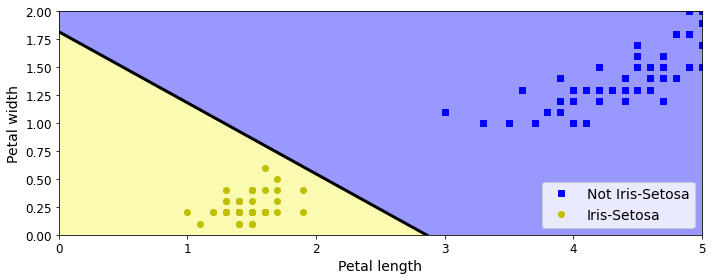

In [7]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

You may have noticed that the Perceptron learning algorithm strongly resembles Stochastic Gradient Descent. In fact, Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

Note that contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they make predictions based on a hard threshold. This is one reason to prefer Logistic Regression over Perceptrons.

#### Limitations 
In their 1969 monograph Perceptrons, Marvin Minsky and Seymour Papert highlighted a number of serious weaknesses of Perceptrons—in particular, the fact that they are incapable of solving some trivial problems (e.g., the Exclusive OR (XOR) classification problem).

#### The Solution
It turns out that some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. The resulting ANN is called a Multilayer Perceptron (MLP). An MLP can solve the XOR problem.

# The Multilayer Perceptron and Backpropagation

An MLP is composed of one (passthrough) input layer, one or more layers of TLUs, called hidden layers, and one final layer of TLUs called the output layer (see Figure 10-7). The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers. Every layer except the output layer includes a bias neuron and is fully connected to the next layer.

![title](images/mlp_1.png) 

**NOTE:** The signal flows only in one direction (from the inputs to the outputs),
so this architecture is an example of a **feedforward neural network
(FNN).**

When an ANN contains a deep stack of hidden layers,9 it is called a **deep neural network (DNN).** The field of Deep Learning studies DNNs, and more generally models containing deep stacks of computations. Even so, many people talk about Deep Learning whenever neural networks are involved (even shallow ones).

For many years researchers struggled to find a way to train MLPs, without success. But in 1986, David Rumelhart, Geoffrey Hinton, and Ronald Williams published a groundbreaking paper that introduced the **backpropagation training algorithm**, which is still used today. **In short, it is Gradient Descent using an efficient technique for computing the gradients automatically: in just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network’s error with regard to every single model parameter.** In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

**NOTE:** Automatically computing gradients is called automatic differentiation,
or autodiff. There are various autodiff techniques, with different
pros and cons. The one used by backpropagation is called
reverse-mode autodiff. It is fast and precise, and is well suited when
the function to differentiate has many variables (e.g., connection
weights) and few outputs (e.g., one loss). 

### Backpropagation in More Detail

Let’s run through this algorithm in a bit more detail:
- It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.
- Each mini-batch is passed to the network’s input layer, which sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.
- Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).
- Then it computes how much each output connection contributed to the error. This is done analytically by applying the chain rule (perhaps the most fundamental rule in calculus), which makes this step fast and precise.
- The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until the algorithm reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (hence the name of the algorithm).
- Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

**SUMMARY:** This algorithm is so important that it’s worth summarizing it again: for each training instance, the backpropagation algorithm first makes a prediction (forward pass) and measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally tweaks the connection weights to reduce the error (Gradient Descent step).

**WARNING:** It is important to initialize all the hidden layers’ connection weights randomly, or else training will fail. For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won’t be too smart. If instead you randomly initialize the weights, you break the symmetry and allow backpropagation to train a diverse team of neurons.

### Popular Activation Functions
- logistic (sigmoid) function, σ(z) = 1 / (1 + exp(–z)).
- The hyperbolic tangent function: tanh(z) = 2σ(2z) – 1
- The Rectified Linear Unit function: ReLU(z) = max(0, z)

### Why do we need activation functions in the first place? 
Well, if you chain several linear transformations, all you get is a linear transformation. For example, if f(x) = 2x + 3 and g(x) = 5x – 1, then chaining these two linear functions gives you another linear function: f(g(x)) = 2(5x – 1) + 3 = 10x + 1. So if you don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and you can’t solve very complex problems with that. Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.

# Regression MLP's

First, MLPs can be used for regression tasks. If you want to predict a single value (e.g., the price of a house, given many of its features), then you just need a single output neuron: its output is the predicted value. For multivariate regression (i.e., to predict multiple values at once), you need one output neuron per output dimension

In general, when building an MLP for regression, you do not want to use any activation function for the output neurons, so they are free to output any range of values. If you want to guarantee that the output will always be positive, then you can use the ReLU activation function in the output layer. Alternatively, you can use the softplus activation function, which is a smooth variant of ReLU: softplus(z) = log(1 + exp(z)). It is close to 0 when z is negative, and close to z when z is positive. Finally, if you want to guarantee that the predictions will fall within a given range of values, then you can use the logistic function or the hyperbolic tangent, and then scale the labels to the appropriate range: 0 to 1 for the logistic function and –1 to 1 for the hyperbolic tangent.

The loss function to use during training is typically the mean squared error, but if you
have a lot of outliers in the training set, you may prefer to use the mean absolute
error instead. Alternatively, you can use the Huber loss, which is a combination of
both.

**NOTE:** The Huber loss is quadratic when the error is smaller than a threshold
δ (typically 1) but linear when the error is larger than δ. The
linear part makes it less sensitive to outliers than the mean squared
error, and the quadratic part allows it to converge faster and be
more precise than the mean absolute error.

![title](images/mlp_reg.png) 


# Classification MLPs

MLPs can also be used for classification tasks. For a binary classification problem, you just need a single output neuron using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. The estimated probability of the negative class is equal to one minus that number.

MLPs can also easily handle multilabel binary classification tasks (see Chapter 3). For example, you could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email. In this case, you would need two output neurons, both using the logistic activation function: the first would output the probability that the email is spam, and the second would output the probability that it is urgent. More generally, you would dedicate one output neuron for each positive class. Note that the output probabilities do not necessarily add up to 1. This lets the model output any combination of labels: you can have nonurgent ham, urgent ham, nonurgent spam, and perhaps even urgent spam (although that would probably be an error).

If each instance can belong only to a single class, out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the softmax activation function for the whole output layer (see Figure 10-9). The softmax function (introduced in Chapter 4) will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1 (which is required if the classes are exclusive). This is called multiclass classification.

![title](images/mlp_cla_1.png) 

![title](images/mlp_cla_2.png) 


**TIP:** Before we go on, I recommend you go through exercise 1 at the  
end of this chapter. You will play with various neural network  
architectures and visualize their outputs using the TensorFlow Playground.  
This will be very useful to better understand MLPs, including  
the effects of all the hyperparameters (number of layers and  
neurons, activation functions, and more).  